In [1]:
# Chapter 3 - Linear regression

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import IPython as ipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')

### 8. This question involves the use of simple linear regression on the Auto data set.  
(a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor.   Use the summary() function to print the results. Comment on the output.  
For example:  
i. Is there a relationship between the predictor and the response?  
ii. How strong is the relationship between the predictor and the response?  
iii. Is the relationship between the predictor and the response positive or negative?  
iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?  

In [3]:
auto = pd.read_csv('./Datasets/Auto.csv', index_col=0)

In [4]:
simple_model = smf.ols('mpg ~ horsepower', auto).fit()

In [5]:
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           7.03e-81
Time:                        18:37:06   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000        38.525    41.347
horsepower    -0.1578      0.006    -24.489      0.000        -0.171    -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. There is relationship between horsepower and mpg  
2. This relationship is relatively weak, but according to p-value, it is significant  
3. Relationship is negative  



In [6]:
def response_confidence_interval(model, y_predicted, alpha=.05):
    t = sp.stats.t.ppf(1-alpha/2, model.nobs-1)
    se = np.sqrt(model.mse_resid)
    
    return (y_predicted - t * se, y_predicted + t * se)

In [7]:
def predictive_interval(y_predicted, y_training, alpha=.05):

    n_obs = len(y_training)
    t = sp.stats.t.ppf(1-alpha/2, n_obs-1)
    y_mean = np.mean(y_training)
    y_var = np.var(y_training)
    
    return (y_mean - t * y_var * np.sqrt(1+1/n_obs), y_mean + t * y_var * np.sqrt(1+1/n_obs))

In [8]:
y_predicted = simple_model.predict(pd.DataFrame({'horsepower':[98]}))[0]
print('Predicted mpg for horsepower=98 is {}'.format(y_predicted))
print('Associated confidence interval is ({}, {})'.format(*response_confidence_interval(simple_model, y_predicted)))
print('Predictive interval for mpg given horsepower={} is ({}, {})'.format(98, *predictive_interval(y_predicted, auto['mpg'])))

Predicted mpg for horsepower=98 is 24.467077152512434
Associated confidence interval is (14.822115334238466, 34.1120389707864)
Predictive interval for mpg given horsepower=98 is (-96.16892272177728, 143.06075945647117)


(b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.  

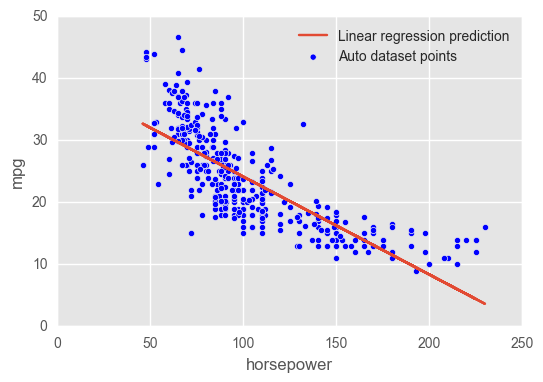

In [9]:
plt.scatter(auto['horsepower'], auto['mpg'], label='Auto dataset points')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.plot(auto['horsepower'], simple_model.predict(), label='Linear regression prediction')
plt.legend(loc='best')
plt.show()

(c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.  

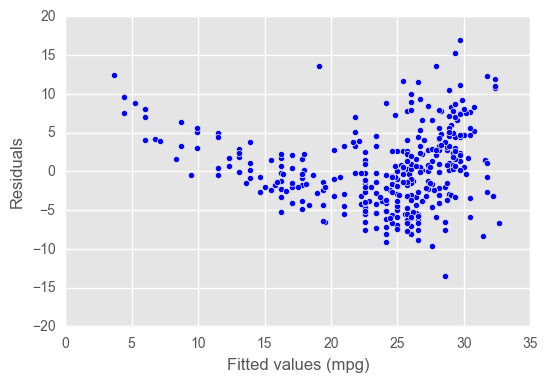

In [10]:
plt.scatter(simple_model.fittedvalues, simple_model.resid)
plt.xlabel('Fitted values (mpg)')
plt.ylabel('Residuals')
plt.show()

We can see heteroskedasticity.

### 9. This question involves the use of multiple linear regression on the Auto data set.  
(a) Produce a scatterplot matrix which includes all of the variables in the data set.  

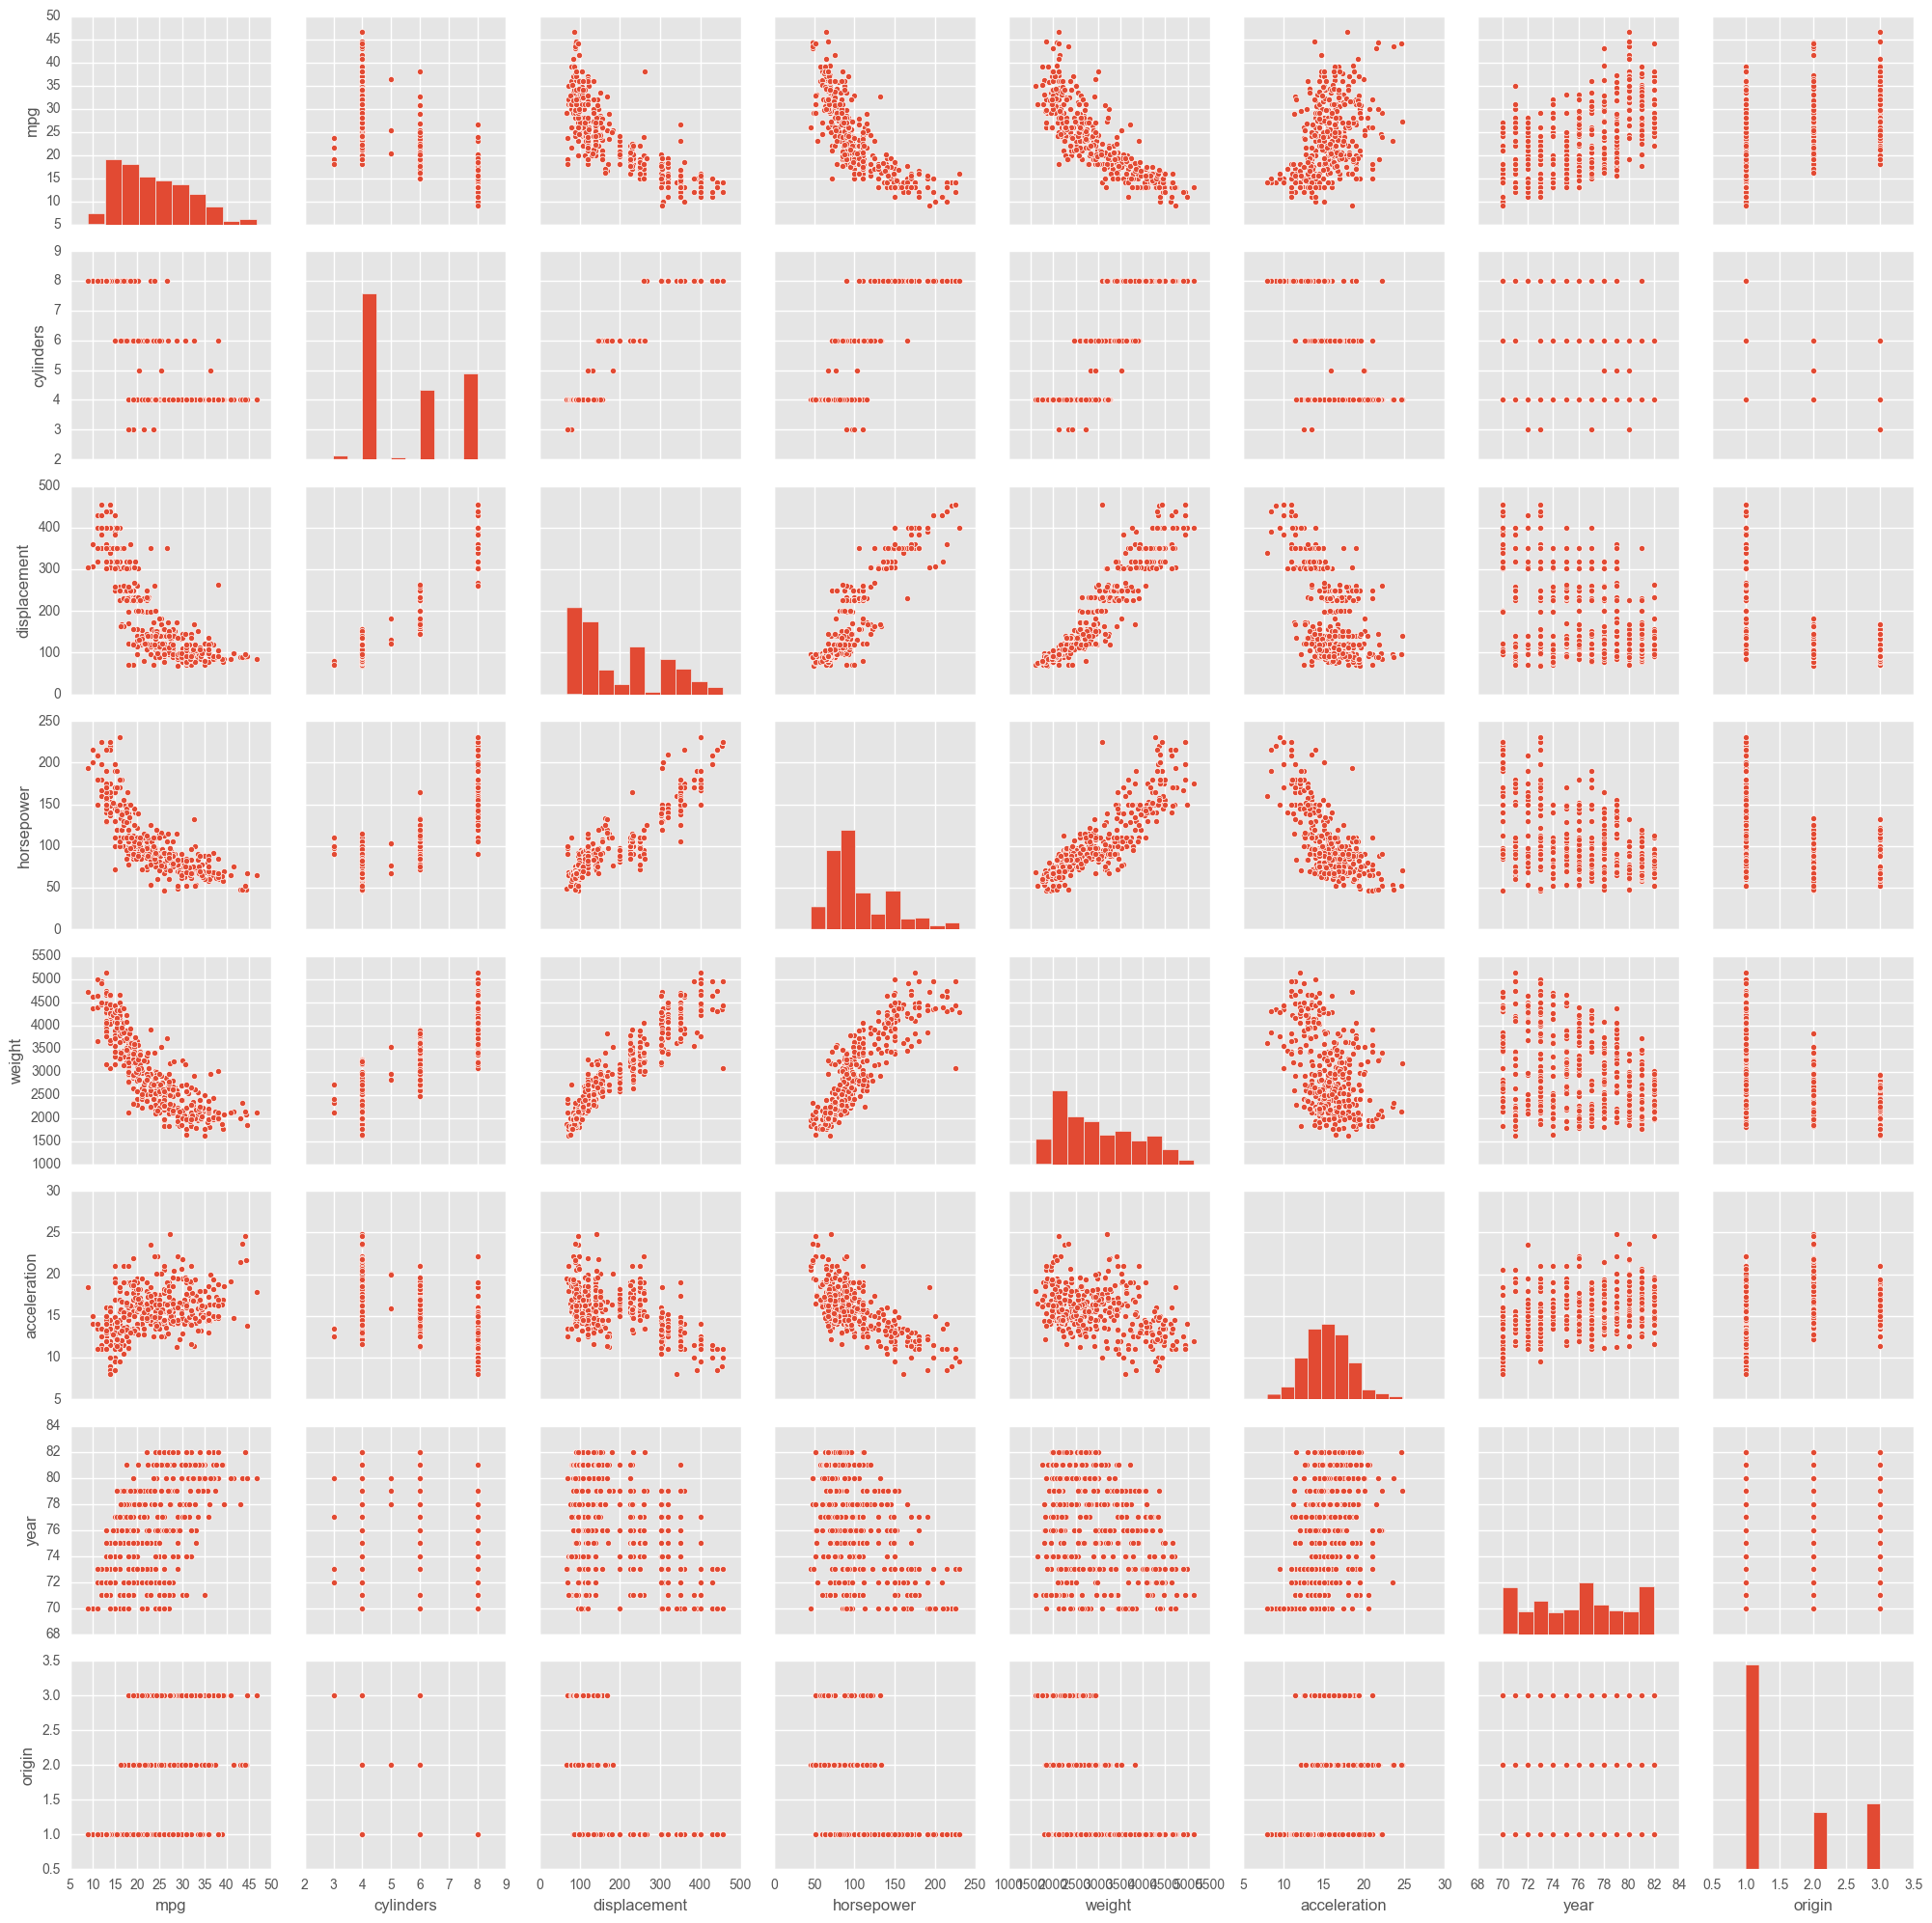

In [11]:
sns.pairplot(auto)

(b) Compute the matrix of correlations between the variables using the function cor() . You will need to exclude the name variable, which is qualitative.  

In [12]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


(c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:  
i. Is there a relationship between the predictors and the response?  
ii. Which predictors appear to have a statistically significant relationship to the response?  
iii. What does the coefficient for the year variable suggest?  

In [13]:
mult_model = smf.ols('mpg~' + '+'.join(auto.columns.difference(['mpg', 'name']) ), data=auto).fit()

In [14]:
mult_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 06 Nov 2016   Prob (F-statistic):          2.04e-139
Time:                        18:37:24   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000       -26.350    -8.087
acceleration     0.0806      0.099      0.815      0.415        -0.114     0.275
cylinders       -0.4934      0.323     -1.526      0.128        -1.129     0.142
displacement     0.0199      0.008      2.647      0.008         0.005     0.035
horsepower      -0.0170      0.014     -1.230      0.220        -0.044     0.010
origin           1.4261      0.278      5.127      0.000         0.879     1.973
weight          -0.0065      0.001     -9.929      0.000        -0.008    -0.005
year             0.7508      0.051     14.729      0.000         0.651     0.851
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. There is a relationship between predictors and response  
2. displacement, origin, weight and year coefficients are statistically significant  
3. All equal, car models that presented in one year from now will have mpg higher by 0.75 than models, presented in this year.  

(d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?  

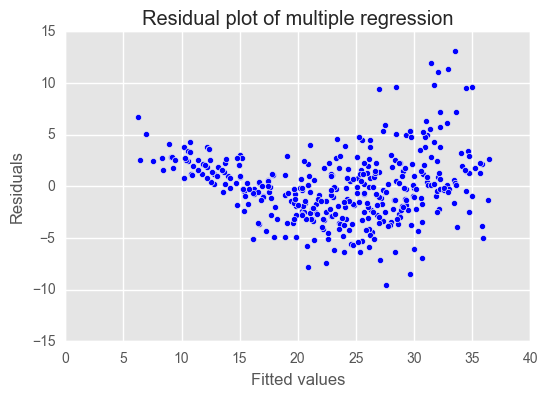

In [15]:
plt.scatter(mult_model.fittedvalues, mult_model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual plot of multiple regression')
plt.show()

As we can see, there is heteroskedasticity in resuduals.

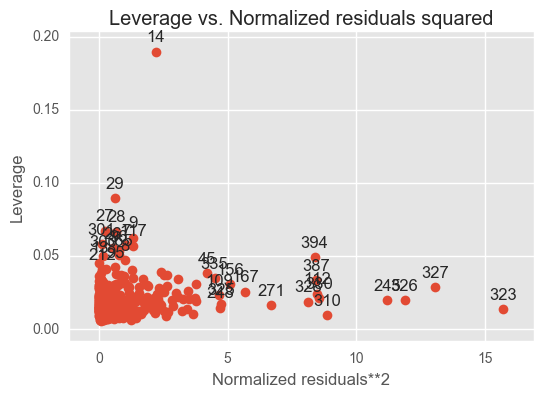

In [16]:
_ = sm.graphics.plot_leverage_resid2(mult_model)

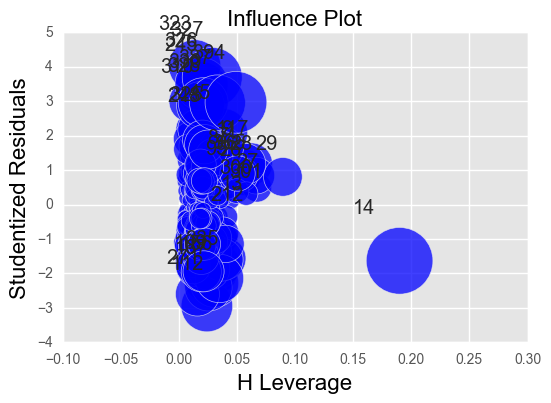

In [17]:
_ = sm.graphics.influence_plot(mult_model)

We can see that observation number 14 has unusual predictor values.

In [18]:
auto.iloc[14, :]

mpg                                24
cylinders                           4
displacement                      113
horsepower                         95
weight                           2372
acceleration                       15
year                               70
origin                              3
name            toyota corona mark ii
Name: 15, dtype: object

(e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [19]:
mult_model_int = smf.ols('mpg~' + '+'.join(auto.columns.difference(['mpg', 'name']) ) + '+ cylinders : horsepower', data=auto).fit()
mult_model_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     299.3
Date:                Sun, 06 Nov 2016   Prob (F-statistic):          1.33e-159
Time:                        18:37:27   Log-Likelihood:                -972.89
No. Observations:                 392   AIC:                             1964.
Df Residuals:                     383   BIC:                             2000.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               11.7025      4.912      2.383      0.018         2.046    21.360
acceleration            -0.1703      0.090     -1.889      0.060        -0.348     0.007
cylinders               -4.3061      0.458     -9.400      0.000        -5.207    -3.405
displacement            -0.0014      0.007     -0.201      0.840        -0.015     0.012
horsepower              -0.3157      0.031    -10.304      0.000        -0.376    -0.255
origin                   0.9032      0.250      3.617      0.000         0.412     1.394
weight                  -0.0039      0.001     -6.250      0.000        -0.005    -0.003
year                     0.7393      0.045     16.476      0.000         0.651     0.828
cylinders:horsepower     0.0402      0.004     10.619      0.000         0.033     0.048
==============================================================================
Omnibus:                       42.400   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.790
Skew:                           0.635   Prob(JB):                     7.78e-18
Kurtosis:                       4.792   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interaction between number of cylinders and horsepower is significant.

(f) Try a few different transformations of the variables, such as $log(X), sqrt(X), X^2$ . Comment on your findings.

In [20]:
mult_model_tr = smf.ols('mpg~' + '+'.join(auto.columns.difference(['mpg', 'name']) ) + '+ np.sqrt(horsepower) + np.sqrt(weight)', data=auto).fit()
mult_model_tr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     270.7
Date:                Sun, 06 Nov 2016   Prob (F-statistic):          8.63e-160
Time:                        18:37:27   Log-Likelihood:                -969.48
No. Observations:                 392   AIC:                             1959.
Df Residuals:                     382   BIC:                             1999.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              66.4690      9.317      7.134      0.000        48.150    84.788
acceleration           -0.2126      0.100     -2.120      0.035        -0.410    -0.015
cylinders              -0.0980      0.290     -0.338      0.736        -0.669     0.473
displacement           -0.0007      0.007     -0.098      0.922        -0.015     0.013
horsepower              0.2745      0.059      4.677      0.000         0.159     0.390
origin                  0.7085      0.254      2.794      0.005         0.210     1.207
weight                  0.0106      0.004      2.938      0.004         0.004     0.018
year                    0.7690      0.045     17.026      0.000         0.680     0.858
np.sqrt(horsepower)    -7.0168      1.356     -5.176      0.000        -9.682    -4.351
np.sqrt(weight)        -1.6353      0.419     -3.907      0.000        -2.458    -0.812
==============================================================================
Omnibus:                       36.614   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.753
Skew:                           0.538   Prob(JB):                     2.62e-16
Kurtosis:                       4.798   Cond. No.                     1.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Square roots of horsepower and weight predictors are significant, because they capture nonlinear relationship with responce variable.  

### 10. This question should be answered using the Carseats data set.  
(a) Fit a multiple regression model to predict Sales using Price, Urban , and US.  

In [21]:
carseats = pd.read_csv('./Datasets/carseats.csv', index_col=0)
carseats['Urban'] = carseats['Urban'].map({'Yes':1, 'No':0})
carseats['US'] = carseats['US'].map({'Yes':1, 'No':0})
carseats['ShelveLoc'] = carseats['ShelveLoc'].map({'Bad':0, 'Medium':1, 'Good':2})

In [22]:
mult_model = smf.ols('Sales ~ Price + Urban + US', carseats).fit()

In [23]:
mult_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           2.39e-23
Time:                        18:37:27   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.000        11.764    14.323
Price         -0.0545      0.005    -10.389      0.000        -0.065    -0.044
Urban         -0.0219      0.272     -0.081      0.936        -0.556     0.512
US             1.2006      0.259      4.635      0.000         0.691     1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

All else equal:  
Price increase by $1 decrease sales by 0.06 units  
Sales in US are 1 unit higher  
Sales in urban area is 0.02 lower than in rural area  

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

$$
Sales = 
\left\{ \begin{matrix}13.0435 - 0.0545 \times Price, if \ rural \ and \ not \ US
\\13.0216 - 0.0545 \times Price, if \ urban \ and \ not \ US
\\14.2441 - 0.0545 \times Price, if \ rural \ and \ US
\\14.2222 - 0.0545 \times Price, if \ urban \ and \ US
\end{matrix}\right.
$$




d) For which of the predictors can you reject the null hypothesis $H_0 : β_j = 0$?

For price and US

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.  

In [24]:
mult_model_s = smf.ols('Sales ~ Price + US', carseats).fit()
mult_model_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           2.66e-24
Time:                        18:37:27   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000        11.790    14.271
Price         -0.0545      0.005    -10.416      0.000        -0.065    -0.044
US             1.1996      0.258      4.641      0.000         0.692     1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(f) How well do the models in (a) and (e) fit the data?

Both models fit the data almost the same

(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).  (In table)

(h) Is there evidence of outliers or high leverage observations in the model from (e)?

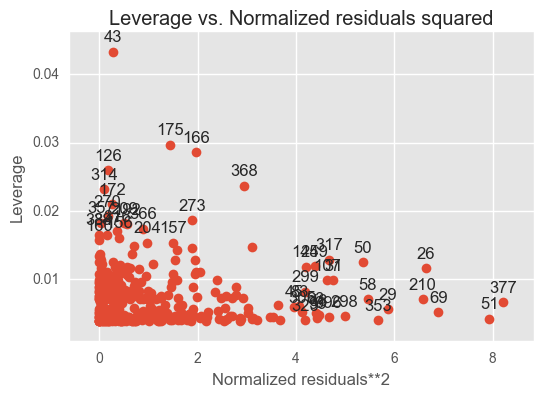

In [25]:
_ = sm.graphics.plot_leverage_resid2(mult_model_s)

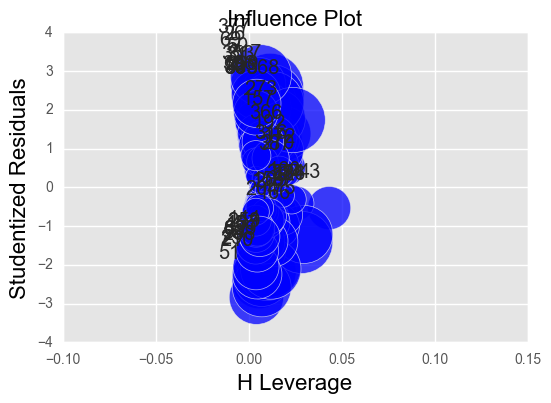

In [26]:
_ = sm.graphics.influence_plot(mult_model_s)

There is no oultier points. Observation with number 43 has high leverage (unusual regressor values).

### 11. In this problem we will investigate the t-statistic for the null hypothesis $H_0 : β = 0$ in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.
> set.seed(1)  
> x=rnorm(100)  
> y=2*x+rnorm(100)  

In [27]:
np.random.seed(1)
x = np.random.normal(size=(100,))
y = 2 * x + np.random.normal(size=(100,))

(a) Perform a simple linear regression of $y$ onto $x$ , without an intercept. Report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis $H_0 : β = 0$. Comment on these results. (You can perform regression without an intercept using the command lm(y∼x+0) .)

In [28]:
model = smf.OLS(y, x, hasconst=False).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           3.46e-36
Time:                        18:37:29   Log-Likelihood:                -135.67
No. Observations:                 100   AIC:                             273.3
Df Residuals:                      99   BIC:                             275.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000         1.896     2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$
\hat{\beta} = 2.1067\\
se(\hat{\beta}) = 0.106\\
t = 19.792\\
p-value = 0
$$
$\hat{\beta}$ is significant. Increase in $x$ by 1 increases responce py 2.1067.

(b) Now perform a simple linear regression of $x$ onto $y$ without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis $H_0 : β = 0$. Comment on these results.

In [29]:
model_2 = smf.OLS(x, y, hasconst=False).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           3.46e-36
Time:                        18:37:29   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000         0.341     0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$
\hat{\beta} = 0.3789\\
se(\hat{\beta}) = 0.019\\
t = 19.792\\
p-value = 0
$$
$\hat{\beta}$ is significant. Increase in $y$ by 1 increases response py 0.3789.

(c) What is the relationship between the results obtained in (a) and(b)?  
- (b) is an inverse function of (a)

(d) For the regression of Y onto X without an intercept, the t-statistic for $H_0 : β = 0$ takes the form
$\hat{\beta} / SE(\hat{\beta})$, where
$\hat{\beta}$ is
given by (3.38), and where


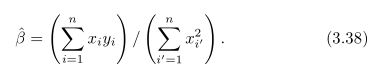

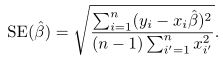

In [30]:
ipy.display.display(ipy.display.Image('ch2_b_hat.jpg'))
ipy.display.display(ipy.display.Image('ch2_se.jpg'))

(These formulas are slightly different from those given in Sections 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and confirm numerically in R , that the t-statistic can be written as

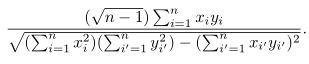

In [31]:
ipy.display.display(ipy.display.Image('ch2_show.jpg'))

In [32]:
# t = beta/SE(beta)
model.params[0] / model.bse[0]

19.791801987091201

In [33]:
# calculating t with expanded beta and se(beta)
beta = np.sum(x * y) / np.sum(x ** 2)
se = np.sqrt(np.sum((y - beta * x) ** 2)/((model.nobs - 1) * np.sum(x ** 2)))
beta / se

19.791801987091201

In [34]:
# calculating t with rewritten formula
(np.sqrt(model.nobs - 1) * np.sum(x*y)) / np.sqrt(np.sum(x ** 2) * np.sum(y ** 2) - np.sum (x*y) **2)

19.791801987091205

e) Using the results from (d), argue that the t-statistic for the regression of y onto x is the same as the t-statistic for the regression of x onto y .  
We could claim that t-statistics for both regressions are the same, because we have same data for both models and the only difference is that we change roles of y and x. This is irrelevant for calculation as we can see in last equation.  

(f) In R , show that when regression is performed with an intercept, the t-statistic for $H_0 : β_1 = 0$ is the same for the regression of $y$ onto $x$ as it is for the regression of $x$ onto $y$ 

In [35]:
smf.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           3.46e-36
Time:                        18:37:30   Log-Likelihood:                -135.67
No. Observations:                 100   AIC:                             273.3
Df Residuals:                      99   BIC:                             275.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000         1.896     2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
smf.OLS(x, y).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           3.46e-36
Time:                        18:37:30   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000         0.341     0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see, both regression's coefficients have the same t-statistic.

### 12. This problem involves simple linear regression without an intercept.
(a) Recall that the coefficient estimate $\hat{\beta}$ for the linear regression of $Y$ onto $X$ without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?  

Coefficient estimetates for both regressions are the same only if $X = Y$, so $\hat{\beta}=1$.

(b) Generate an example in R with $n = 100$ observations in which the coefficient estimate for the regression of $X$ onto $Y$ is different from the coefficient estimate for the regression of $Y$ onto $X$.  

In [38]:
X = np.random.randn(100)
y = np.random.randn(100)
print('Regression of X onto Y summary:')
print(smf.OLS(y, X).fit().summary())
print('Regression of Y onto X summary:')
print(smf.OLS(X, y).fit().summary())

Regression of X onto Y summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2769
Date:                Sun, 06 Nov 2016   Prob (F-statistic):              0.600
Time:                        18:46:54   Log-Likelihood:                -148.01
No. Observations:                 100   AIC:                             298.0
Df Residuals:                      99   BIC:                             300.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.055

(c) Generate an example in R with $n = 100$ observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of $Y$ onto $X$.  

In [39]:
X = np.random.randn(100)
y = X
print('Regression of X onto Y summary:')
print(smf.OLS(y, X).fit().summary())
print('Regression of Y onto X summary:')
print(smf.OLS(X, y).fit().summary())

Regression of X onto Y summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.318e+32
Date:                Sun, 06 Nov 2016   Prob (F-statistic):               0.00
Time:                        18:47:41   Log-Likelihood:                 3350.8
No. Observations:                 100   AIC:                            -6700.
Df Residuals:                      99   BIC:                            -6697.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.000

### 13. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use set.seed(1) prior to starting part (a) to ensure consistent results.  
(a) Using the rnorm() function, create a vector, $x$, containing 100 observations drawn from a $N(0,1)$ distribution. This represents a feature, $X$.  
(b) Using the rnorm() function, create a vector, $eps$ , containing 100 observations drawn from a $N(0,0.25)$ distribution i.e. a normal distribution with mean zero and variance 0.25.

In [40]:
np.random.seed(1)
x = np.random.randn(100)
eps = np.random.normal(scale=.25 ** 0.5, size=(100,))

(c) Using x and eps , generate a vector y according to the model
$$
Y = −1 + 0.5X + \epsilon 
$$
What is the length of the vector $y$ ? What are the values of $β_0$ and $β_1$ in this linear model?  

In [43]:
# length of y is 100, beta_0=-1, beta_1=0.5
y = -1 + 0.5 * x + eps

(d) Create a scatterplot displaying the relationship between $x$ and $y$. Comment on what you observe.

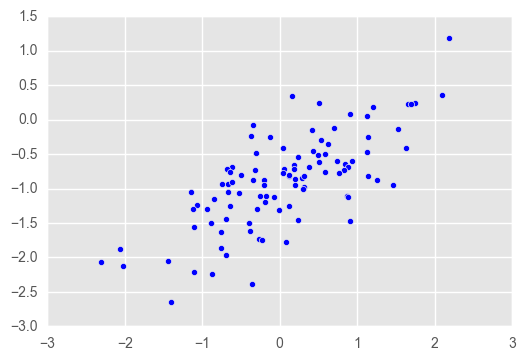

In [44]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

We can see high positive correlation between $x$ and $y$.

(e) Fit a least squares linear model to predict $y$ using $x$. Comment on the model obtained. How do $\hat{\beta_0}$ and
$\hat{\beta_1}$ compare to $\beta_0$ and $\beta_1$?

In [57]:
model = smf.OLS(y, np.stack([np.ones(x.shape), x], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           2.20e-17
Time:                        19:12:30   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.000        -1.020    -0.833
x1             0.5477      0.053     10.342      0.000         0.443     0.653
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see, estimated parameters are close to true parameters of response variable.

In [ ]:
(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() command to create an appropriate legend.  

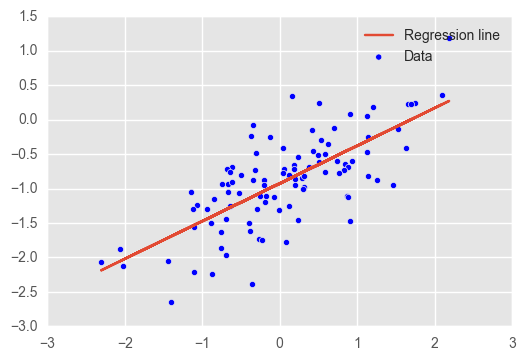

In [55]:
plt.scatter(x, y, label='Data')
plt.plot(x, model.fittedvalues, label='Regression line')
plt.legend(loc='best')

(g) Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$ . Is there evidence that the quadratic term improves the model fit? Explain your answer.  

In [56]:
model_poly = smf.OLS(y, np.stack([np.ones(x.shape), x, x ** 2], axis=1)).fit()
model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           2.83e-16
Time:                        19:12:16   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.9325      0.058    -16.158      0.000        -1.047    -0.818
x1             0.5468      0.053     10.229      0.000         0.441     0.653
x2             0.0077      0.043      0.181      0.856        -0.077     0.092
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is no fit improvements as, because coefficient $\hat{\beta_2}$ is not significant.

(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model equation should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     207.8
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           5.94e-26
Time:                        19:37:42   Log-Likelihood:                -17.325
No. Observations:                 100   AIC:                             38.65
Df Residuals:                      98   BIC:                             43.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.0138      0.029    -34.796      0.0

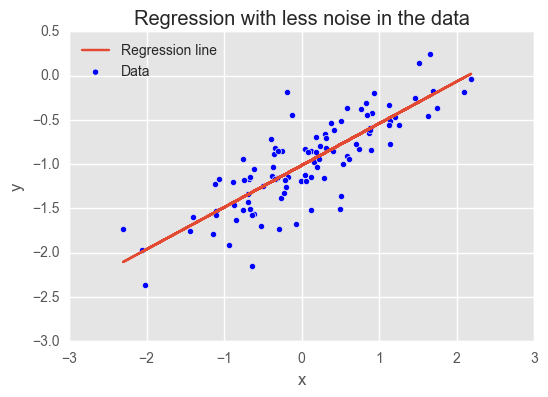

In [71]:
eps = np.random.normal(scale=.09 ** 0.5, size=(100,))
y = -1 + 0.5 * x + eps
model_less_noise = smf.OLS(y, np.stack([np.ones(x.size), x], axis=1)).fit()
print(model_less_noise.summary())
plt.scatter(x, y, label='Data')
plt.plot(x, model_less_noise.fittedvalues, label='Regression line')
plt.title('Regression with less noise in the data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

We could observe better fit to the data (according to $R^2$) and more close estimate of the coefficients to the true ones.

(i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model
equation should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     23.71
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           4.30e-06
Time:                        19:22:23   Log-Likelihood:                -123.68
No. Observations:                 100   AIC:                             251.4
Df Residuals:                      98   BIC:                             256.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.8973      0.084    -10.633      0.0

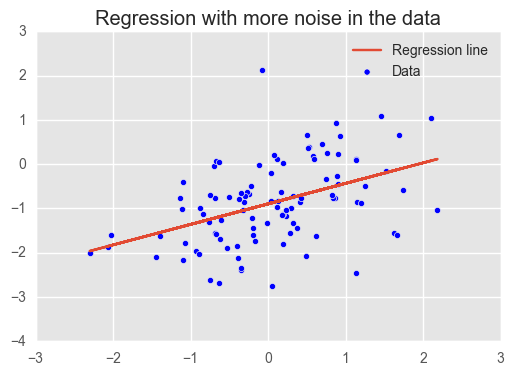

In [61]:
eps = np.random.normal(scale=.64 ** 0.5, size=(100,))
y = -1 + 0.5 * x + eps
model_more_noise = smf.OLS(y, np.stack([np.ones(x.size), x], axis=1)).fit()
print(model_more_noise.summary())
plt.scatter(x, y, label='Data')
plt.plot(x, model_more_noise.fittedvalues, label='Regression line')
plt.title('Regression with more noise in the data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

Datapoints are more spread out from the regression line, so the fit is less accurate.

(j) What are the confidence intervals for $β_0$ and $β_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.  


In [68]:
print('Original model confidence intervals')
print(model.conf_int())
print('Model with less noise confidence intervals')
print(model_less_noise.conf_int())
print('Model with more noise confidence intervals')
print(model_more_noise.conf_int())

Original model confidence intervals
[[-1.11218459 -0.77962009]
 [ 0.26933998  0.64417583]]
Model with less noise confidence intervals
[[-1.07211769 -0.95727601]
 [ 0.39305909  0.52249798]]
Model with more noise confidence intervals
[[-1.06476241 -0.72982551]
 [ 0.27436768  0.65187748]]


Both original model and 'noisy' model have confidence intervals of the same width (although with different boundary values), while confidence intervals for model with less noisy data is narrower.

### 14. This problem focuses on the collinearity problem.
(a) Perform the following commands in R :  
> set.seed(1)  
> x1=runif(100)  
> x2=0.5*x1+rnorm(100)/10  
> y=2+2*x1+0.3*x2+rnorm(100)  

The last line corresponds to creating a linear model in which $y$ is a function of $x1$ and $x2$. Write out the form of the linear model. What are the regression coefficients?  

$$
y= 2 + 2x1 + 0.3x2 + \epsilon
\\\beta_0 = 2
\\\beta_1=2
\\\beta_2=0.3
$$

In [72]:
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.randn(100) / 10
y = 2 + 2*x1 + 0.3 * x2 + np.random.randn(100)

(b) What is the correlation between $x1$ and $x2$? Create a scatterplot displaying the relationship between the variables.

[[ 1.          0.83905962]
 [ 0.83905962  1.        ]]


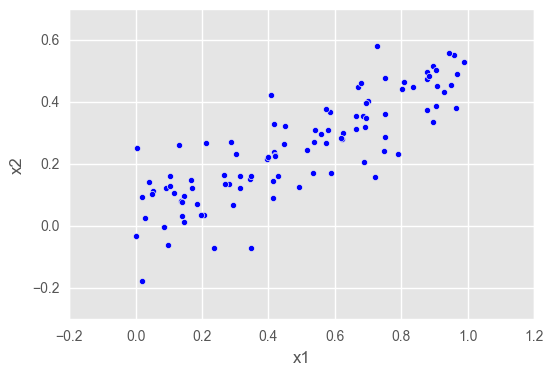

In [73]:
print(sp.corrcoef(x1, x2))
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')

(c) Using this data, fit a least squares regression to predict y using $x1$ and $x2$. Describe the results obtained. What are
$\hat{\beta_0}$, $\hat{\beta_1}$, and $\hat{\beta_2}$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$ ? Can you reject the null hypothesis $H_0 : β_1 = 0$? How about the null hypothesis $H_0 : β_2 = 0$?

In [74]:
model_coll = smf.OLS(y, np.stack([np.ones(x1.shape), x1, x2], axis=1)).fit()
model_coll.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           4.40e-07
Time:                        19:41:06   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.1893      0.199     11.021      0.000         1.795     2.584
x1             0.7046      0.637      1.107      0.271        -0.559     1.968
x2             2.5024      1.140      2.194      0.031         0.239     4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficient estimates $\hat{\beta_1}$, and $\hat{\beta_2}$ are too far from true values. I can reject $H_0 : β_1 = 0$ on 95% confidence level, because p-value for estimate of $\beta_1$ is greater than 0.05.

(d) Now fit a least squares regression to predict $y$ using only $x1$.Comment on your results. Can you reject the null hypothesis $H_0 : β_1 = 0$?

In [75]:
smf.OLS(y, np.stack([np.ones(x1.shape), x1], axis=1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           6.68e-07
Time:                        19:44:24   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.2486      0.201     11.209      0.000         1.850     2.647
x1             1.8770      0.353      5.316      0.000         1.176     2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For this regression $\hat{\beta_1}$ is close to it's true value. On 95% confidence level I could reject null hypothesis that $\hat{\beta_1}=0$.

(e) Now fit a least squares regression to predict $y$ using only $x2$.Comment on your results. Can you reject the null hypothesis $H_0 : β_1 = 0$?

In [78]:
smf.OLS(y, np.stack([np.ones(x2.shape), x2], axis=1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           1.09e-07
Time:                        19:48:31   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.2655      0.187     12.145      0.000         1.895     2.636
x1             3.5613      0.621      5.733      0.000         2.329     4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficiend for exog variable x2 is far from it's true value from equation of y. x2 is capturing all of the variation from x1. On 95% confidence level I could reject null hypothesis that $\hat{\beta_1}=0$.

(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.  

Results in all three model estimations contradict to each other. This instability in coefficient estimation is caused by collinearity between independent variables.

(g) Now suppose we obtain one additional observation, which was unfortunately mismeasured.
> x1=c(x1, 0.1)  
> x2=c(x2, 0.8)  
> y=c(y,6) 

Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.  

In [83]:
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           5.51e-08
Time:                        20:00:49   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.1996      0.199     11.041      0.0

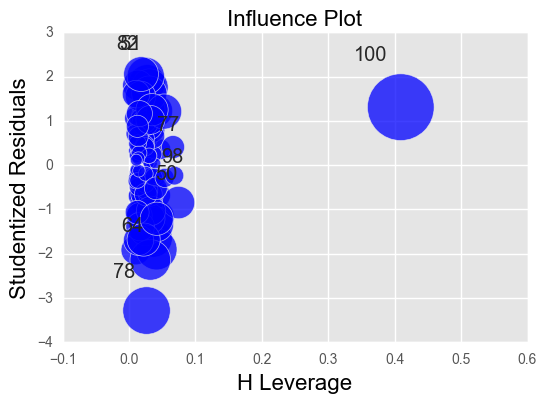

In [89]:
m1 = smf.OLS(y, np.stack([np.ones(x1.shape), x1, x2], axis=1)).fit()
print(m1.summary())
_ = sm.graphics.influence_plot(m1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           9.15e-06
Time:                        20:01:17   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.3583      0.208     11.331      0.0

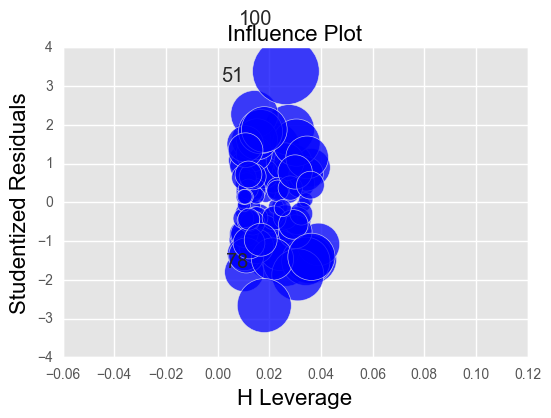

In [90]:
m2 = smf.OLS(y, np.stack([np.ones(x1.shape), x1], axis=1)).fit()
print(m2.summary())
_ = sm.graphics.influence_plot(m2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           7.41e-09
Time:                        20:01:41   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.2331      0.182     12.271      0.0

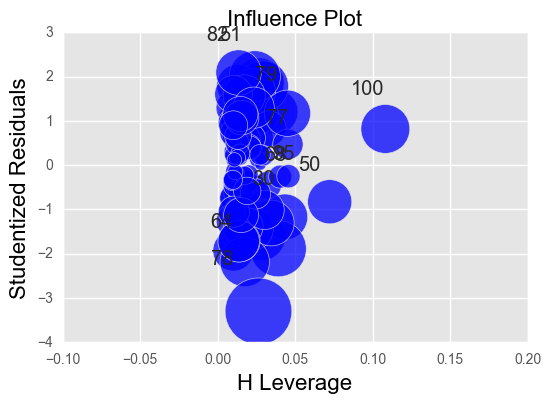

In [91]:
m3 = smf.OLS(y, np.stack([np.ones(x2.shape), x2], axis=1)).fit()
print(m3.summary())
_ = sm.graphics.influence_plot(m3)

This new observation significantly changed estimates of the coefficients. For the full model and model with x2 new observation have high leverage. Model with only x1 does not have new observation as outlier of with high leverage.  

### 15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.  
(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.  

In [92]:
boston = pd.read_csv('./Datasets/Boston.csv', index_col=0)
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Regression of age onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           2.85e-16
Time:                        20:29:21   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.7779   

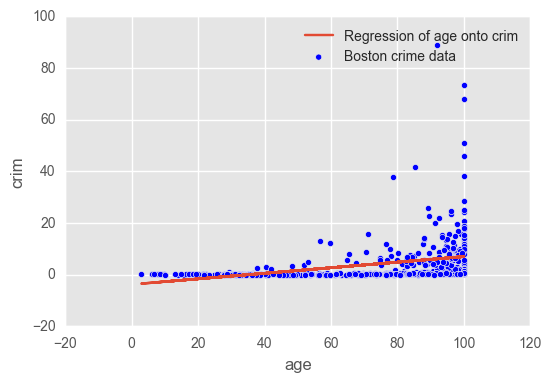

Regression of black onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     87.74
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           2.49e-19
Time:                        20:29:22   Log-Likelihood:                -1765.8
No. Observations:                 506   AIC:                             3536.
Df Residuals:                     504   BIC:                             3544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     16.5535 

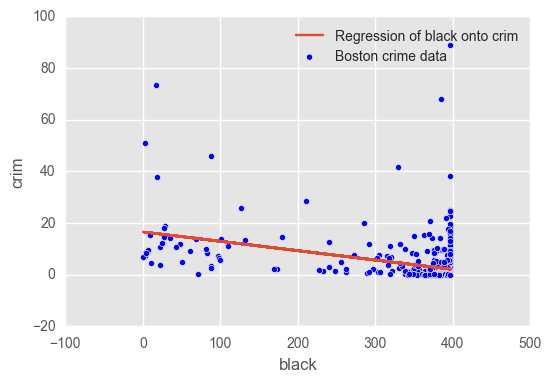

Regression of chas onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Sun, 06 Nov 2016   Prob (F-statistic):              0.209
Time:                        20:29:22   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.7444  

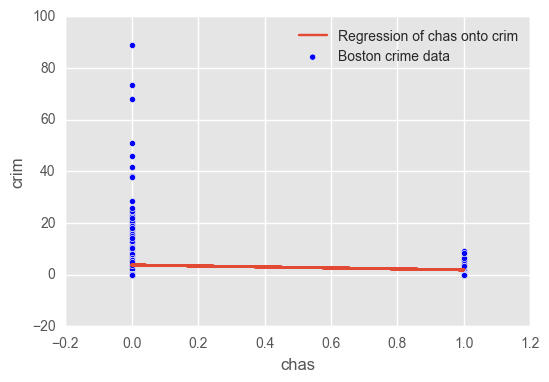

Regression of dis onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           8.52e-19
Time:                        20:29:22   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.4993   

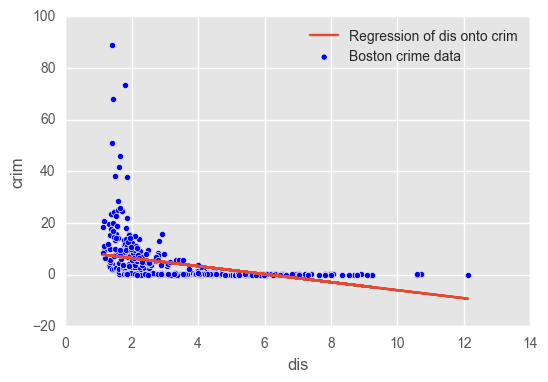

Regression of indus onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           1.45e-21
Time:                        20:29:23   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.0637 

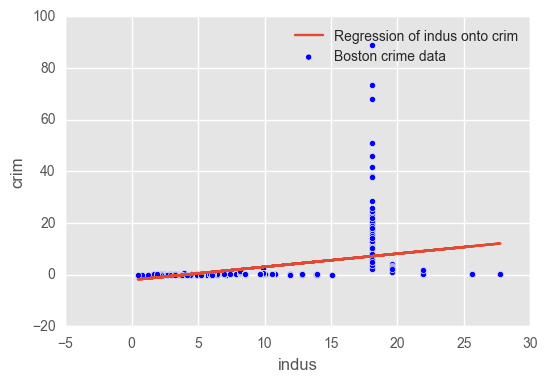

Regression of lstat onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           2.65e-27
Time:                        20:29:23   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.3305 

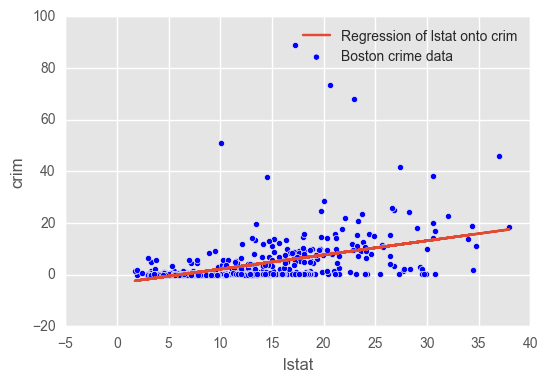

Regression of medv onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           1.17e-19
Time:                        20:29:24   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     11.7965  

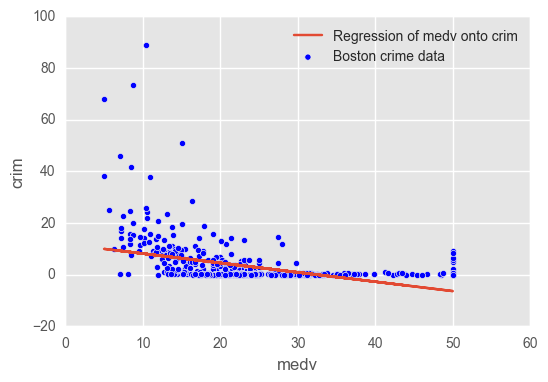

Regression of nox onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           3.75e-23
Time:                        20:29:24   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -13.7199   

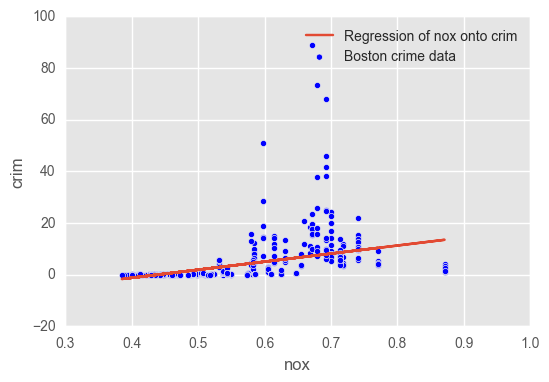

Regression of ptratio onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           2.94e-11
Time:                        20:29:25   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -17.646

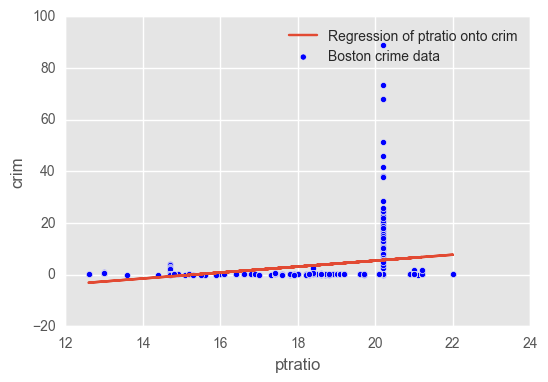

Regression of rad onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           2.69e-56
Time:                        20:29:25   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.2872   

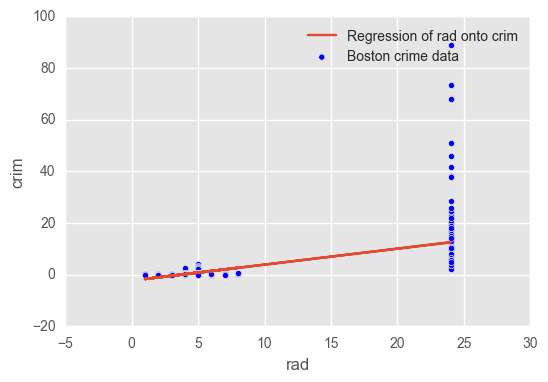

Regression of rm onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           6.35e-07
Time:                        20:29:25   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     20.4818    

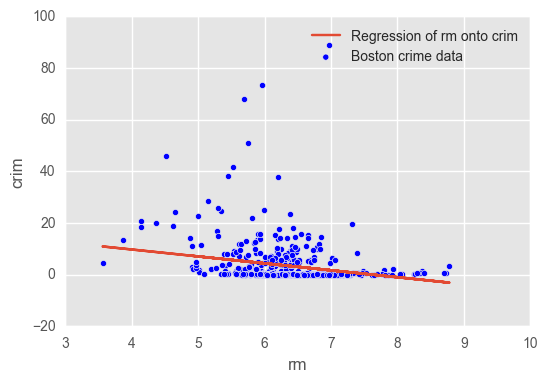

Regression of tax onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           2.36e-47
Time:                        20:29:26   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -8.5284   

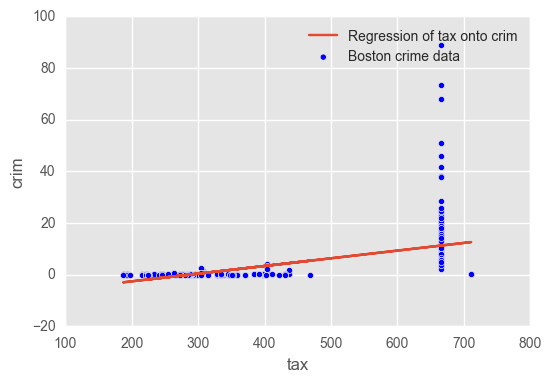

Regression of zn onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           5.51e-06
Time:                        20:29:26   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.4537    

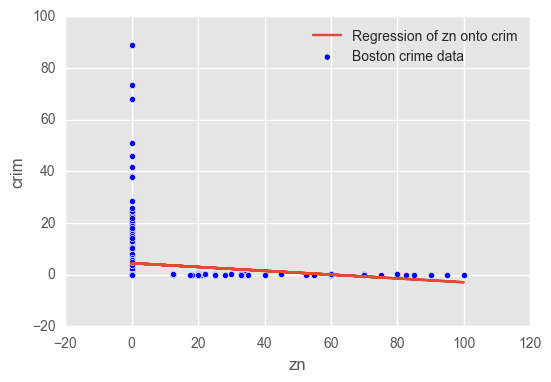

In [105]:
predictors = boston.columns.difference(['crim'])
univ_coeffs = list()
for pr in predictors:
    m = smf.ols('crim ~ '+pr, boston).fit()
    univ_coeffs.append(m.params[pr])
    print('Regression of {} onto crim'.format(pr))
    print(m.summary())
    plt.scatter(boston[pr], boston['crim'], label='Boston crime data')
    plt.plot(boston[pr], m.fittedvalues, label='Regression of {} onto crim'.format(pr))
    plt.xlabel(pr)
    plt.ylabel('crim')
    plt.legend(loc='best')
    plt.show()

Only for regression of chas (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise))  onto crim (per capita rate of crime per town) estimate of independent variable coefficient is not significant. 

(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0 : β_j = 0$?

In [101]:
mult_m = smf.ols('crim ~ ' + '+'.join(predictors), boston).fit()
mult_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           1.57e-56
Time:                        20:21:43   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019         2.818    31.248
age            0.0015      0.018      0.081      0.935        -0.034     0.037
black         -0.0075      0.004     -2.052      0.041        -0.015    -0.000
chas          -0.7491      1.180     -0.635      0.526        -3.068     1.570
dis           -0.9872      0.282     -3.503      0.001        -1.541    -0.433
indus         -0.0639      0.083     -0.766      0.444        -0.228     0.100
lstat          0.1262      0.076      1.667      0.096        -0.023     0.275
medv          -0.1989      0.061     -3.287      0.001        -0.318    -0.080
nox          -10.3135      5.276     -1.955      0.051       -20.679     0.052
ptratio       -0.2711      0.186     -1.454      0.147        -0.637     0.095
rad            0.5882      0.088      6.680      0.000         0.415     0.761
rm             0.4301      0.613      0.702      0.483        -0.774     1.634
tax           -0.0038      0.005     -0.733      0.464        -0.014     0.006
zn             0.0449      0.019      2.394      0.017         0.008     0.082
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We could reject null hypothesis for the following predictors: age, chas, indus, lstat, nox, ptration, rm, tax.

(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

C:\Users\dmitr\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


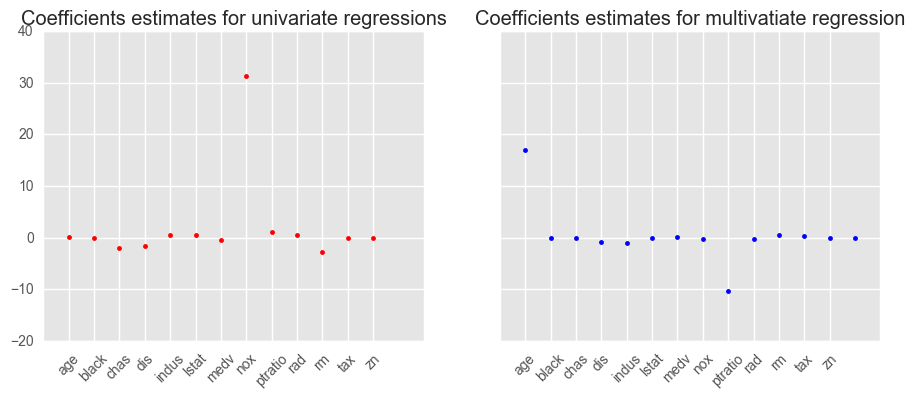

In [153]:
xticks = np.arange(len(predictors))
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='all')

ax1.plot(univ_coeffs, 'r.')
ax1.yaxis.set_label('Coefficient estimates')
ax1.xaxis.set_label('Predictor')
ax1.set_xticklabels(list(predictors), rotation=45)
ax1.set_xticks(xticks)
ax1.set_xlim(-1, len(predictors)+1)
ax1.set_title('Coefficients estimates for univariate regressions')

ax2.plot(mult_m.params.values, 'b.')
ax2.yaxis.set_label('Coefficient estimates')
ax2.xaxis.set_label('Predictor')
ax2.set_xticklabels(list(predictors), rotation=45)
ax2.set_xticks(xticks)
ax2.set_xlim(-1, len(predictors)+1)
ax2.set_title('Coefficients estimates for multivatiate regression')
fig.set_figwidth(fig.get_figwidth() * 1.8)
fig.show()

(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form 
$$
Y = β_0 + β_1 X + β_2 X^2 + β_3 X^3 + \epsilon
$$

Regression of age + age^2 + age^3 onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     35.31
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           1.02e-20
Time:                        21:38:55   Log-Likelihood:                -1757.9
No. Observations:                 506   AIC:                             3524.
Df Residuals:                     502   BIC:                             3541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------

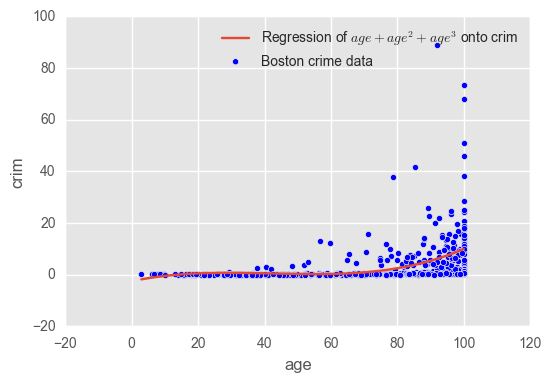

Regression of black + black^2 + black^3 onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     29.49
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           1.41e-17
Time:                        21:38:55   Log-Likelihood:                -1765.3
No. Observations:                 506   AIC:                             3539.
Df Residuals:                     502   BIC:                             3555.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------

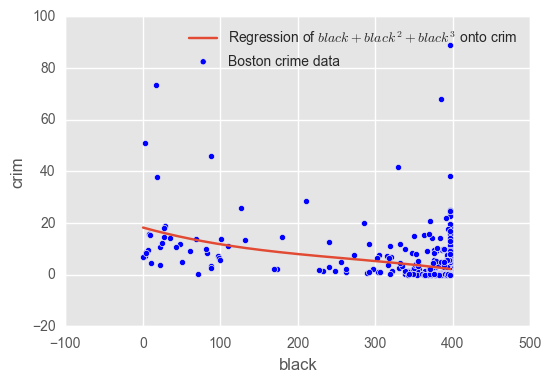

Regression of chas + chas^2 + chas^3 onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Sun, 06 Nov 2016   Prob (F-statistic):              0.209
Time:                        21:38:56   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------

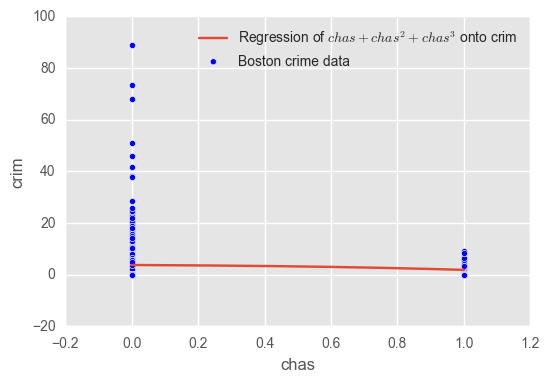

Regression of dis + dis^2 + dis^3 onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     64.37
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           3.14e-35
Time:                        21:38:56   Log-Likelihood:                -1724.0
No. Observations:                 506   AIC:                             3456.
Df Residuals:                     502   BIC:                             3473.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------

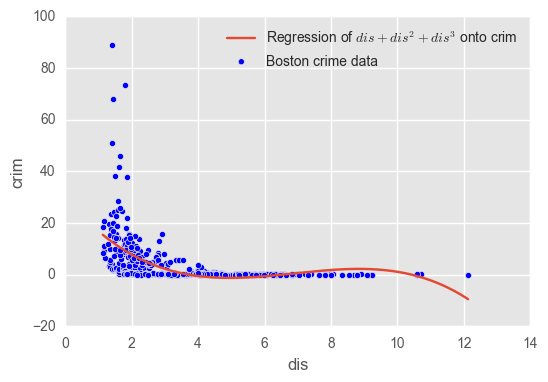

Regression of indus + indus^2 + indus^3 onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     58.69
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           1.55e-32
Time:                        21:38:57   Log-Likelihood:                -1730.3
No. Observations:                 506   AIC:                             3469.
Df Residuals:                     502   BIC:                             3486.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------

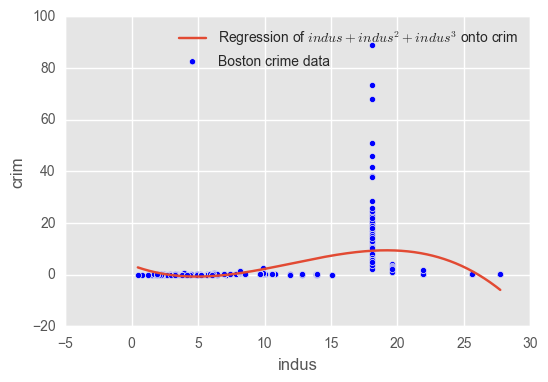

Regression of lstat + lstat^2 + lstat^3 onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     46.63
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           1.35e-26
Time:                        21:38:57   Log-Likelihood:                -1744.2
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     502   BIC:                             3513.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------

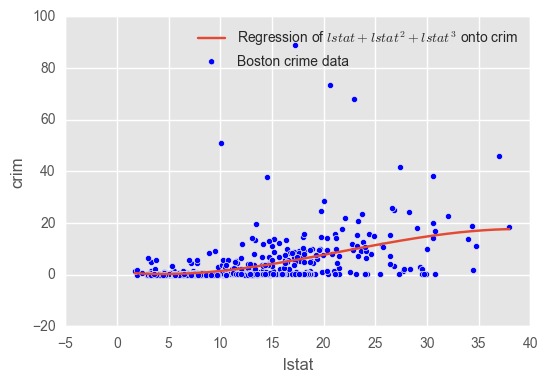

Regression of medv + medv^2 + medv^3 onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     121.3
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           4.45e-59
Time:                        21:38:58   Log-Likelihood:                -1668.5
No. Observations:                 506   AIC:                             3345.
Df Residuals:                     502   BIC:                             3362.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------

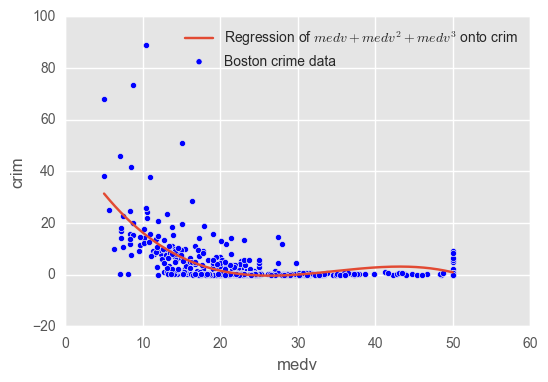

Regression of nox + nox^2 + nox^3 onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     70.69
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           3.81e-38
Time:                        21:38:58   Log-Likelihood:                -1717.2
No. Observations:                 506   AIC:                             3442.
Df Residuals:                     502   BIC:                             3459.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------

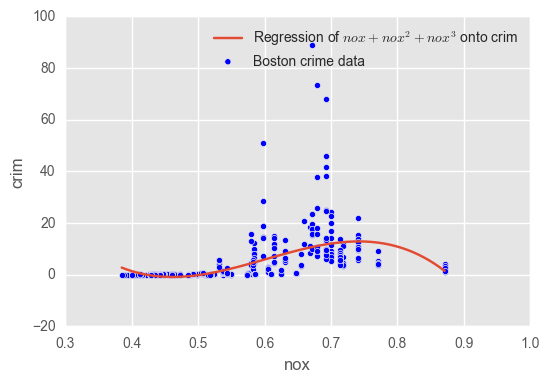

Regression of ptratio + ptratio^2 + ptratio^3 onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     21.48
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           4.17e-13
Time:                        21:38:59   Log-Likelihood:                -1775.8
No. Observations:                 506   AIC:                             3560.
Df Residuals:                     502   BIC:                             3577.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------

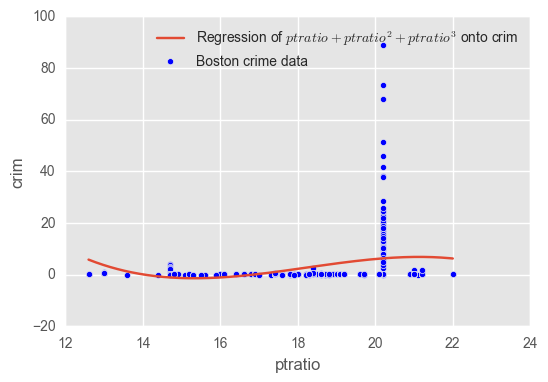

Regression of rad + rad^2 + rad^3 onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     111.6
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           2.31e-55
Time:                        21:38:59   Log-Likelihood:                -1677.1
No. Observations:                 506   AIC:                             3362.
Df Residuals:                     502   BIC:                             3379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------

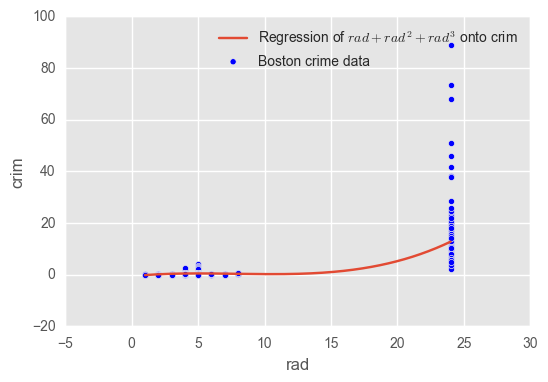

Regression of rm + rm^2 + rm^3 onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     12.17
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           1.07e-07
Time:                        21:39:00   Log-Likelihood:                -1788.6
No. Observations:                 506   AIC:                             3585.
Df Residuals:                     502   BIC:                             3602.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
I

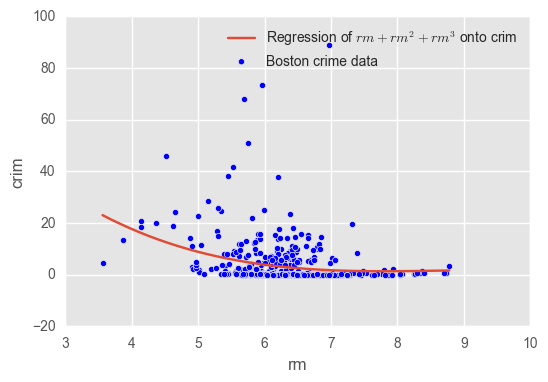

Regression of tax + tax^2 + tax^3 onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     97.80
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           7.34e-50
Time:                        21:39:01   Log-Likelihood:                -1689.9
No. Observations:                 506   AIC:                             3388.
Df Residuals:                     502   BIC:                             3405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------

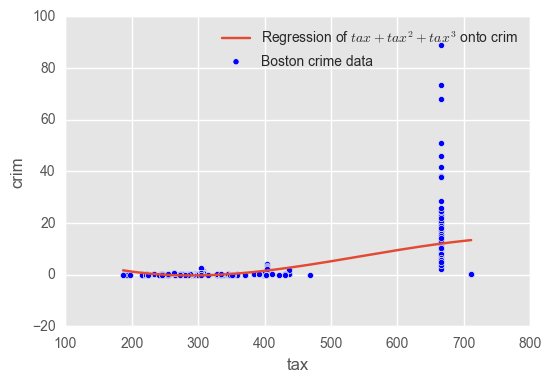

Regression of zn + zn^2 + zn^3 onto crim
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           1.28e-06
Time:                        21:39:02   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
I

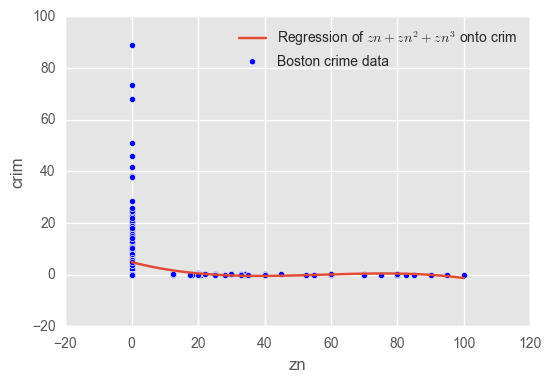

In [179]:
for pr in predictors:
    m = smf.ols('crim ~ '+pr+'+np.power('+pr+',2)+np.power('+pr+',3)', boston).fit()
    print('Regression of {0} + {0}^2 + {0}^3 onto crim'.format(pr))
    print(m.summary())
    plt.scatter(boston[pr], boston['crim'], label='Boston crime data')
    feature_min = boston[pr].min()
    feature_max = boston[pr].max()
    x_range = np.linspace(feature_min, feature_max, len(boston[pr]))
    regr_y_values = m.predict(pd.DataFrame({pr:x_range}))
    plt.plot(x_range, regr_y_values, label='Regression of ${0} + {0}^2 + {0}^3$ onto crim'.format(pr))
    plt.xlabel(pr)
    plt.ylabel('crim')
    plt.legend(loc='best')
    plt.show()
    

For the following predictors each model capture non-linear relationship with crim variable: age, black, dis, medv, nox, rm. Although we could argue, is this is true non-linear relationship or this phenomena caused by outliers.